# Übung 4

In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
from sklearn.preprocessing import StandardScaler #Data preparation
from sklearn.model_selection import train_test_split #Data preparation
from sklearn.linear_model import LinearRegression #Modeling
from sklearn.tree import DecisionTreeRegressor #Modeling
from sklearn.linear_model import LogisticRegression #Modeling
from sklearn.naive_bayes import GaussianNB #Modeling
from sklearn.cluster import KMeans #Modeling
from sklearn.metrics import mean_squared_error #Model evaluation
from sklearn.metrics import classification_report #Model evaluation
from sklearn.metrics import confusion_matrix #Model evaluation
from sklearn.metrics import accuracy_score #Model evaluation

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1. Regressionsalgorithmen

Für die erste Aufgabe verwenden wir ein Datenset über Versicherte, und was diese auf Grund Ihrer Informationen als Rate an die jeweilige Versicherung zahlen.

In [2]:
# Importiere den Datensatz
path = './src/'
insur_df = pd.read_csv(path+'insurance.csv')

# Erhalte Überblick über Zeilen und Spalten
print('\nAnzahl der Zeilen und Spalten im Datensatz: ',insur_df.shape)


Anzahl der Zeilen und Spalten im Datensatz:  (1338, 7)


In [3]:
# Sehen wir uns die obersten Zeilen und Spalten des Datensatzes an
insur_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Wenn wir uns die Form des Datensatzes ansehen, hat diese den Wert (1338,7). Es gibt also 𝐦=1338 Trainingsbeispiele und 𝐧=7 unabhängige Variablen. Die Zielvariable ist hier die Rate gegenüber der Versicherung und die übrigen sechs Variablen wie Alter, Geschlecht, BMI, Kinder, Raucher, Region sind unabhängige Variablen. Da es mehrere unabhängige Variablen gibt, müssen wir eine **multiple lineare Regression durchführen**.

---

**Aufgabe 1**: Erstelle ein Streudiagramm mit Hilfe von Seaborns `lmplot()` Funktion. Beschrifte die X- und die Y-Achse und geben der Darstellung einen Titel. Die Eingabevariable auf der X-Achse ist `bmi`, die Ausgabevariable auf der Y-Achse ist `charges`.

In [4]:
### CODE HERE ###

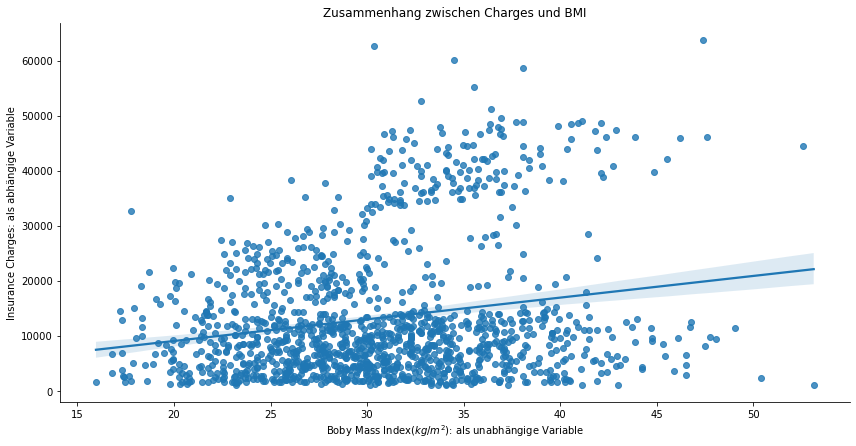

In [5]:
### SOLUTION HERE ###
sns.lmplot(x='bmi', y='charges', data=insur_df, aspect=2, height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: als unabhängige Variable')
plt.ylabel('Insurance Charges: als abhängige Variable')
plt.title('Zusammenhang zwischen Charges und BMI');

---

**Aufgabe 2**: Erstelle eine Heatmap mit Hilfe von Seaborn.

In [6]:
### CODE HERE ###

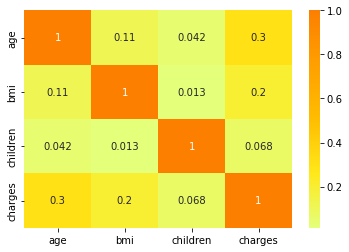

In [7]:
### SOLUTION HERE ###
corr = insur_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

---

**Aufgabe 3**: Was ist Eure Interprestation hinsichtlich der dargestellten Heatmap?

`### BEGRÜNDUNG HERE ###`

---

**Aufgabe 4**: Erstelle zwei Subplots. Das erste hat stellt die `Charges` mit Hilfe von Seaborns `distplot` dar. Der zweite Subplot stellt die Charges nach einer `Log10-Transformation` dar. Gebe beiden Diagrammen einen Titel. Begründe anschließend, warum eine `Log10-Transformation` in dem Fall von Charges vom Vorteil sein kann.

/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Verteilung der Versicherungsbeiträge in $log$ Skala')

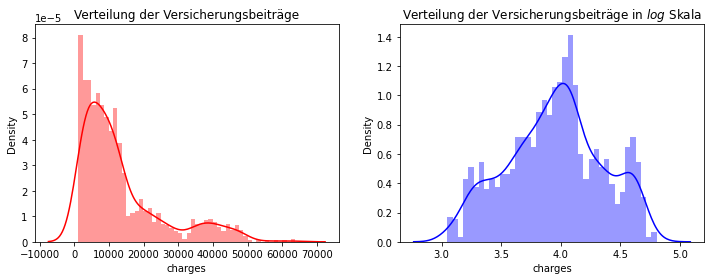

In [8]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insur_df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Verteilung der Versicherungsbeiträge')

ax=f.add_subplot(122)
sns.distplot(np.log10(insur_df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Verteilung der Versicherungsbeiträge in $log$ Skala')

`### BEGRÜNDUNG HERE ###`

Im linken Diagramm schwanken die Gebühren zwischen 1120 und 63500, das Diagramm ist rechtsschief. Im rechten Diagramm werden wir den natürlichen Logarithmus anwenden, dann tendiert das Diagramm annähernd zur Normalität. für die weitere Analyse werden wir den Logarithmus auf die Zielvariablen anwenden.

---

**Aufgabe 5**: Zur Nutzung des Datensatzes müssen die Kategorischen Werte für `['sex','children', 'smoker', 'region']` in einzelne Spalten überführt werden, da diese keiner Ordnung vorliegen. Überführe die Kategorien in separate Spalten, gebe diesen in der Benamung den Prefix `OHE`, droppe das erste Merkmal und nutze den Datentyp `int8`.

Nenne den neuen DataFrame `insur_df_ohe`.

In [9]:
### CODE HERE ###

In [10]:
### SOLUTION HERE ###
cat_col = ['sex','children', 'smoker', 'region']

insur_df_ohe = pd.get_dummies(data = insur_df, 
                              prefix = 'OHE', 
                              columns = cat_col,
                              drop_first =True,
                              dtype='int8')

---

**Aufgabe 6**: Transformiere die Spalte `charges` mit Hilfe von Numpys `log` Transformation.

In [11]:
### CODE HERE ###

In [12]:
### SOLUTION HERE ###
insur_df_ohe['charges'] = np.log(insur_df_ohe['charges'])

---

**Aufgabe 7**: Teile den Datensatz `insur_df_ohe` in Eingabedaten `X` und Ausgabedaten `y` auf. Anschließend führe mit Hilfe von **scikit-learn's** `train_test_split` eine Aufteilung in Trainings- und Testdaten durch. Nutze `random_state=42` und `test_size=0.3`.

In [13]:
### CODE HERE ###

In [14]:
### SOLUTION HERE ###
X = insur_df_ohe.drop('charges',axis=1)
y = insur_df_ohe['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

---

**Aufgabe 8**: Setze ein `LinearRegression` Model mit Hilfe von SKlearn auf und trainiere das Model anschließend mit den vorab definierten Trainingsdaten `X_train` und `y_train`.

In [15]:
### CODE HERE ###

In [16]:
### SOLUTION HERE ###
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

---

**Aufgabe 9**: Erstelle aus den Attributen `coef_` und `feature_names_in_` ein DataFrame und interpretiere die geschätzten Koeffizienten für das lineare Regressionsproblem.

In [17]:
### CODE HERE ###

In [18]:
### SOLUTION HERE ###
pd.DataFrame(data = lin_reg.coef_, index = lin_reg.feature_names_in_, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
OHE_yes,1.557606
OHE_4,0.554547
OHE_5,0.414970
OHE_2,0.263423
OHE_3,0.208758
OHE_1,0.146353
age,0.034570
bmi,0.013721
OHE_northwest,-0.071081
OHE_male,-0.080313


`### BEGRÜNDUNG HERE ###`

---

**Aufgabe 10**: Erstelle für die Inputdaten der Testmenge `X_test` eine `Prediction` und berechne anschließend den MSE mit `mean_squared_error` von **scikit-learn** mit Hilfe von der `Prediction` und `y_test`.

In [19]:
### CODE HERE ###

In [20]:
### SOLUTION HERE ###
y_pred_lr = lin_reg.predict(X_test)
mse = mean_squared_error(y_pred_lr, y_test)
print('Der Mean Square Error(MSE) ist: ',mse)

Der Mean Square Error(MSE) ist:  0.1805122975889313


---

**Aufgabe 11**: Erstelle ein Streudiagramm mit Hilfe von Seaborn, welches die `Prediction` gegen `y_test` darstellt. Gebe der Darstellung einen Titel und interpretiere das Resultat.

In [21]:
### CODE HERE ###

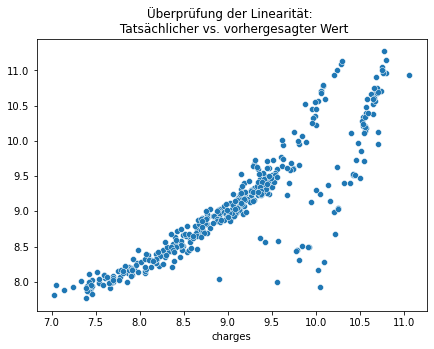

In [22]:
### SOLUTION HERE ###
fig = plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred_lr)
plt.title('Überprüfung der Linearität: \n Tatsächlicher vs. vorhergesagter Wert');

`### BEGRÜNDUNG HERE ###`

---

**Aufgabe 12 (Zusatzaufgabe)**: Erstelle ein Dist-Diagramm mit Hilfe von Seaborn. Der Input ist die Differenz aus `y_test` und `Prediction`. 

In [23]:
### CODE HERE ###

/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


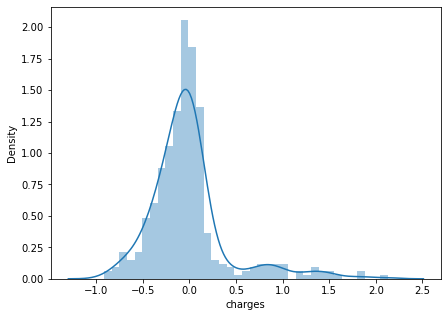

In [24]:
### SOLUTION HERE ###
fig = plt.figure(figsize=(7,5))
sns.distplot((y_test - y_pred_lr));

---

**Aufgabe 13**: Setze ein `DecisionTreeClassifier` Model mit Hilfe von SKlearn auf und trainiere das Model anschließend mit den vorab definierten Trainingsdaten `X_train` und `y_train`. Nutze den Parameter `random_state=42`.

In [25]:
### CODE HERE ###

In [26]:
### SOLUTION HERE ###
dtc = DecisionTreeRegressor(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

---

**Aufgabe 14**: Erstelle für die Inputdaten der Testmenge `X_test` eine `Prediction` und berechne anschließend den MSE mit `mean_squared_error` von **scikit-learn** mit Hilfe von der `Prediction` und `y_test` für `dtc`.

In [27]:
### CODE HERE ###

In [28]:
### SOLUTION HERE ###
y_pred_dtc = dtc.predict(X_test)
mse = mean_squared_error(y_pred_dtc, y_test)
print('Der Mean Square Error(MSE) ist: ',mse)

Der Mean Square Error(MSE) ist:  0.34968445135180276


---

**Aufgabe 15**: Interpretiere und vergleiche die Feature Importance mit den Werten von Linear Regression.

In [29]:
pd.DataFrame(data = dtc.feature_importances_, index = dtc.feature_names_in_, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
OHE_yes,0.435334
age,0.378623
bmi,0.119672
OHE_northwest,0.013536
OHE_male,0.011500
OHE_3,0.009400
OHE_2,0.008905
OHE_southeast,0.008168
OHE_4,0.005174
OHE_1,0.004112


`### BEGRÜNDUNG HERE ###`

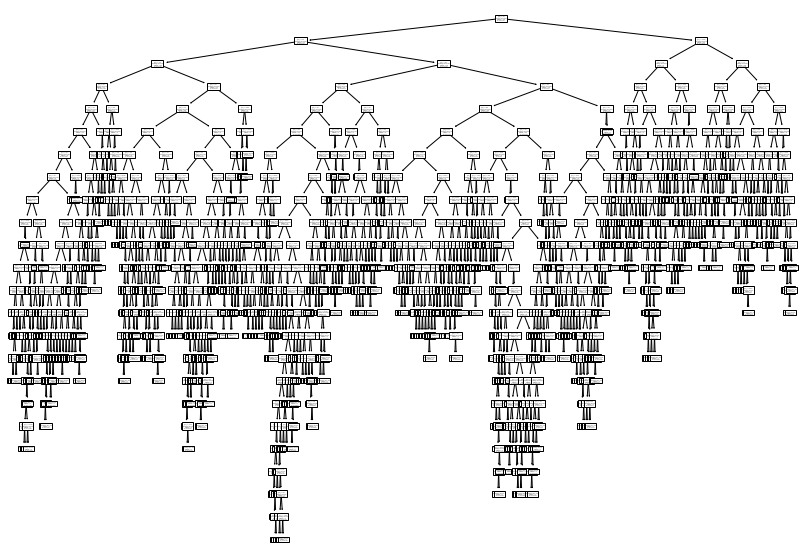

In [30]:
from sklearn import tree
fig = plt.figure(figsize=(14,10))
tree.plot_tree(dtc)
plt.show()

---

**Aufgabe 16**: Erstelle ein Streudiagramm mit Hilfe von Seaborn, welches die `Prediction` beider Modelle (Linear Regression und Decision Tree Regressior) gegen `y_test` darstellt. Gebe der Darstellung einen Titel und interpretiere das Resultat.

In [31]:
### CODE HERE ###

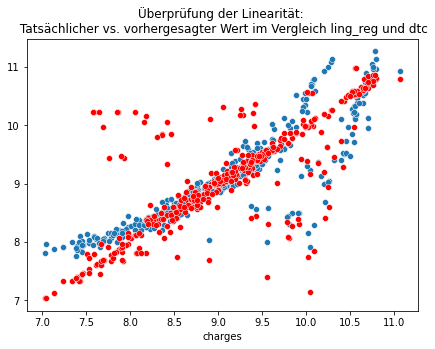

In [32]:
### SOLUTION HERE ###
fig = plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred_lr)
sns.scatterplot(x=y_test,y=y_pred_dtc, color = "r")
plt.title('Überprüfung der Linearität: \n Tatsächlicher vs. vorhergesagter Wert im Vergleich ling_reg und dtc');

---

**Aufgabe 17 (Zusatzaufgabe)**: Erstelle ein Dist-Diagramm mit Hilfe von Seaborn beider Modelle (Linear Regression und Decision Tree Regressior). Der Input ist die Differenz aus `y_test` und `Prediction`.

In [33]:
### CODE HERE ###

/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/pelle-svante.john/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


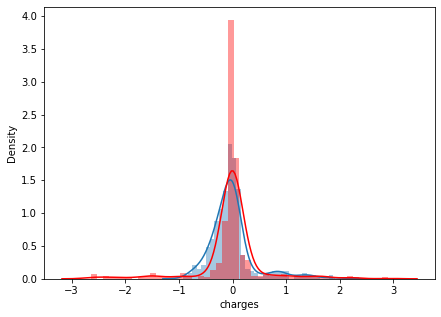

In [34]:
### SOLUTION HERE ###
fig = plt.figure(figsize=(7,5))
sns.distplot((y_test - y_pred_lr));
sns.distplot((y_test - y_pred_dtc), color = 'r');

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2. Klassifikationsalgorithmen

Für die Aufgaben für die Klassifikationsalgorithmen habe mich für den beliebten Datensatz [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci) auf Kaggle entschieden, um das Vorhandensein von Herzkrankheiten anhand verschiedener gesundheitsbezogener Faktoren vorherzusagen.

In [35]:
hd_df = pd.read_csv("./src/heart_cleveland_upload.csv")
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Verwenden `.info()`, um eine zusammenfassende Ansicht des Datensatzes zu erhalten, einschließlich Datentyp, fehlende Daten und Anzahl der Datensätze.

In [36]:
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


---

**Aufgabe 18**: Teile den Datensatz `hd_df` in Eingabedaten `X` und Ausgabedaten `y` (`condition`) auf. Anschließend führe mit Hilfe von **scikit-learn's** `train_test_split` eine Aufteilung in Trainings- und Testdaten durch. Nutze `random_state=42` und `test_size=0.3`.

In [37]:
### CODE HERE ###

In [38]:
### SOLUTION HERE ###
X = hd_df.drop('condition',axis=1)
y = hd_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

---

**Aufgabe 19**: Erstelle eine Liste mit der Variablenbezeichnung `model_pipeline` und füge der Liste zwei Klassifizierungsmodelle zu, `Logistic Regression` und `Guassian Naive Bayes` von **Scikit-Learn**. Nutze für `Logistic Regression` den `solver` `liblinear` und versuche in der Dokumentation zu identifizieren, warum ich diesen initial gewählt habe.

In [39]:
### CODE HERE ###

In [40]:
### SOLUTION HERE ###
model_pipeline = []

model_pipeline.append(LogisticRegression(solver="liblinear"))
model_pipeline.append(GaussianNB())

---

**Aufgabe 20**: Fülle die jeweiligen Lücken in der Model Pipeline aus. Nutze dafür die Kalkulation der Metriken mit Hilfe von **sklearn**.

In [41]:
### CODE HERE ###

''' UNCOMMENT FOR CODING
model_list = ["Logistic Regression", "Gaussian Naive Bayes"]
acc_list = []
cm_list = []

for model in model_pipeline:
    # Trainiere das Model mit `fit` für `X_train` und `y_train` 
    
    # Erhalte Vorhersage für das jeweilige Model auf `X_test`
    y_pred = 
    # Füge der `acc_list` der Ergebnisse der Methode `accuracy_score` hinzu für `y_test` und `y_pred`
    
    # Füge der `cm_listz der Ergebnisse der Methode `confusion_matrix` hinzu für `y_test` und `y_pred`
''' 

' UNCOMMENT FOR CODING\nmodel_list = ["Logistic Regression", "Gaussian Naive Bayes"]\nacc_list = []\ncm_list = []\n\nfor model in model_pipeline:\n    # Trainiere das Model mit `fit` für `X_train` und `y_train` \n    \n    # Erhalte Vorhersage für das jeweilige Model auf `X_test`\n    y_pred = \n    # Füge der `acc_list` der Ergebnisse der Methode `accuracy_score` hinzu für `y_test` und `y_pred`\n    \n    # Füge der `cm_listz der Ergebnisse der Methode `confusion_matrix` hinzu für `y_test` und `y_pred`\n'

In [42]:
### SOLUTION HERE ###
model_list = ["Logistic Regression", "Gaussian Naive Bayes"]
acc_list = []
cm_list = []

for model in model_pipeline:
    # Trainiere das Model mit `fit` für `X_train` und `y_train` 
    model.fit(X_train, y_train)
    # Erhalte Vorhersage für das jeweilige Model auf `X_test`
    y_pred = model.predict(X_test)
    # Füge der `acc_list` der Ergebnisse der Methode `accuracy_score` hinzu für `y_test` und `y_pred`
    acc_list.append(accuracy_score(y_test, y_pred))
    # Füge der `cm_listz der Ergebnisse der Methode `confusion_matrix` hinzu für `y_test` und `y_pred`
    cm_list.append(confusion_matrix(y_test, y_pred))

---

Lasst uns nun einen gemeinsamen Blick auf die Ergebnisse werfen. Versucht das Ergebnis bestmöglich zu interpretieren.

Logistic Regression Accuracy Score: 0.8
Gaussian Naive Bayes Accuracy Score: 0.8


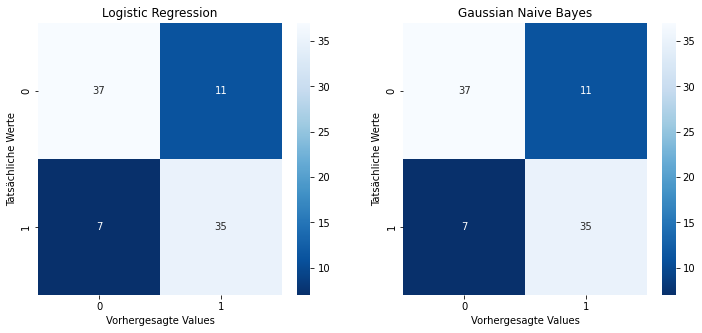

In [43]:
fig = plt.figure(figsize=(12, 5))
for i in range(len(cm_list)):
    print(model_list[i] + ' Accuracy Score: ' + str(acc_list[i]))
    cm = cm_list[i]
    model = model_list[i]
    sub=fig.add_subplot(1,2,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r')
    cm_plot.set_xlabel('Vorhergesagte Values')
    cm_plot.set_ylabel('Tatsächliche Werte')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 3. Clustering-Algorithmen

**Informationen zum Dataset:** Wir werden an einem Problem der Kundensegmentierung im Großhandel arbeiten.

In [44]:
# Laden des Datensatzes
wc_df = pd.read_csv('./src/Wholesale customers data.csv')

# Erste Übersicht über die Daten
wc_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [45]:
# Erhalte eine erste detaillierte Übersicht über die Daten
wc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [46]:
# Erhalte eine erste detaillierte Übersicht über die Daten
wc_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


---

**Aufgabe 21**: Nach der Prüfung, dass alle Werte bereits vollständig sind und als Integer vorhanden, müssen wir die Daten für K-Means auf eine gemeinsame Skalenbasis bringen. Nutze dafür die **Z-Score Transformation** von **SKlearn** über den `StandardScaler`. Sichere den skalierten DataFrame under `wct_df` und überprüfe anschließend das Ergebnis.

In [47]:
### CODE HERE ###

In [48]:
### SOLUTION HERE ###
# Aufrufen der Klasse StandardScaler zur Initiierung des Objektes
scaler = StandardScaler()
# Skalierung der Werte durch Nutzung der Funktion .fit_transform()
wct_df = scaler.fit_transform(wc_df)
# Überprüfung der Ergebnisse
wct_df = pd.DataFrame(wct_df, columns = wc_df.columns)
wct_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Die Größenordnung sollte nun ähnlich aussehen. Als Nächstes erstellen wir eine kmeans-Funktion und passen sie an die Daten an.

---

**Aufgabe 22**: Erstelle ein Modell mit Hilfe von **SKlearn's** `KMeans` Klasse. Führe als Parameter **zwei Cluster** ein und passe den Algorithmus mit der passenden Funktion anschließend auf das Datenset an.

In [49]:
### CODE HERE ###

In [50]:
### SOLUTION HERE ###
# efinition der kmeans-Klasse mit 2 Clustern
kmeans = KMeans(n_clusters=2, random_state=42)

# Anpassung des k-Mittelwert-Algorithmus an skalierte Daten
kmeans.fit(wct_df)

KMeans(n_clusters=2, random_state=42)

Wir wollen nun bewerten, wie gut die gebildeten Cluster sind. Zu diesem Zweck berechnen wir die Trägheit (**intertia_**) des Clusters.

> **inertia_float**: Summe der quadrierten Abstände der Stichproben zu ihrem nächstgelegenen Clusterzentrum, gewichtet mit den Stichprobengewichten, falls angegeben.

In [51]:
kmeans.inertia_

2599.3855593561407

Wir haben einen Trägheitswert von fast **2600**. Nun wollen wir sehen, wie wir die **Elbow Curve** nutzen können, um die optimale Anzahl von Clustern zu bestimmen.

---

**Aufgabe 23**: Iteriere über KMeans Modelle mit den Cluster Werten von 1 zu 20. Folge der Sequenz:
1. Erstelle das Modell für die jeweilige Anzahl der Cluster
2. Fitte die Daten auf das jeweilige Modell an
3. Erhallte den Trägheitswert und speicher diesen in der Liste `inertia_values`

In [52]:
### CODE HERE ###

In [53]:
### SOLUTION HERE ###
inertia_list = []
for cluster in range(1,21):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(wct_df)
    inertia_list.append(kmeans.inertia_)

In [54]:
# Überprüfe dein Ergebnis, gibt es 20 Werte in der Liste
print(len(inertia_list))
print(inertia_list)

20
[3520.000000000001, 2599.3855593561407, 2147.6785841630845, 1838.0334481816726, 1554.7559317579953, 1313.961987424017, 1190.3744766861228, 1057.8992895630604, 984.5809542360316, 919.3929331949905, 858.2225561638719, 802.585926179387, 756.3180730622117, 740.1004580819344, 681.9651450846184, 640.2464954333238, 614.9454126662285, 597.2480138521328, 570.1406505840887, 548.6507630885003]


---

**Aufgabe 24**: Überführe die Ergebnisse in einen Dateframe mit Namen `inertia_df` welches zwei Spalten hat. Eins mit der Anzahl der Cluster mit Namen `Cluster` und eine Spalte mit dem Namen `intertia` mit den eigentlichen Werten.

In [55]:
### CODE HERE ###

In [56]:
### SOLUTION HERE ###
inertia_df = pd.DataFrame({'Cluster':range(1,21), 'Inertia':inertia_list})

Anschließend visualisieren wir die Resultate.

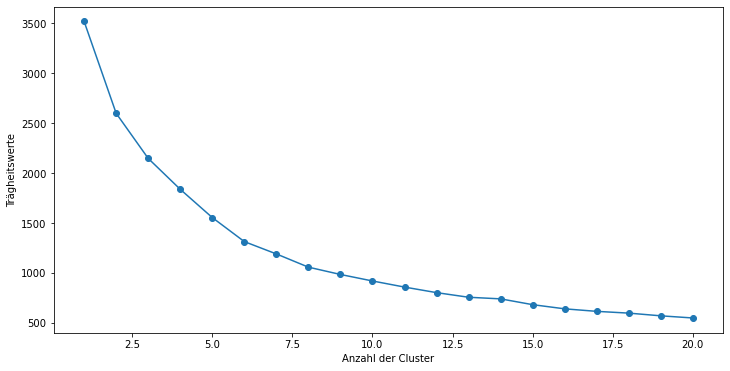

In [57]:
plt.figure(figsize=(12,6))
plt.plot(inertia_df['Cluster'], inertia_df['Inertia'], marker='o')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Trägheitswerte');

---

**Aufgabe 25**: Interpretiere die Ergebnisse, was ist der optimale Punkt aus Deiner Sicht?

`### BEGRÜNDUNG HERE ###`

**Solution**: Wenn man sich die obige Ellbogenkurve ansieht, kann man eine beliebige Anzahl von Clustern zwischen 5 und 8 wählen. 

---

**Aufgabe 26**: Berechne das Modell mit 6 Clustern und führe danach eine Einteilung Deiner Daten in Cluster durch. Speichere das Ergebnis in der Variable `pred`.

In [58]:
### CODE HERE ###

In [59]:
### SOLUTION HERE ###
kmeans = KMeans(n_clusters = 6)
kmeans.fit(wct_df)
pred = kmeans.predict(wct_df)

Betrachten wir schließlich die Anzahl der Punkte in jedem der oben gebildeten Cluster.

---

**Aufgabe 27**: Überführe das Ergebnis in einen DataFrame mit dem Namen `pred_df`. Der DateFrame sollte neben dem eigentlichen Datensatz eine zusätzliche Spalte haben, welche die `pred` widergibt mit dem Spaltennamen `cluster`. Führe anschließend einen `value_count` durch für die Spalte `cluster`.

In [60]:
### CODE HERE ###

In [61]:
### SOLUTION HERE ###
pred_df = pd.DataFrame(wc_df)
pred_df['cluster'] = pred
pred_df['cluster'].value_counts()

2    179
4    125
3     86
0     39
1     10
5      1
Name: cluster, dtype: int64

Des Weiteren können wir die Punkte darstellen, um einen besseren Einblick in die Clusterung zu erhalten.

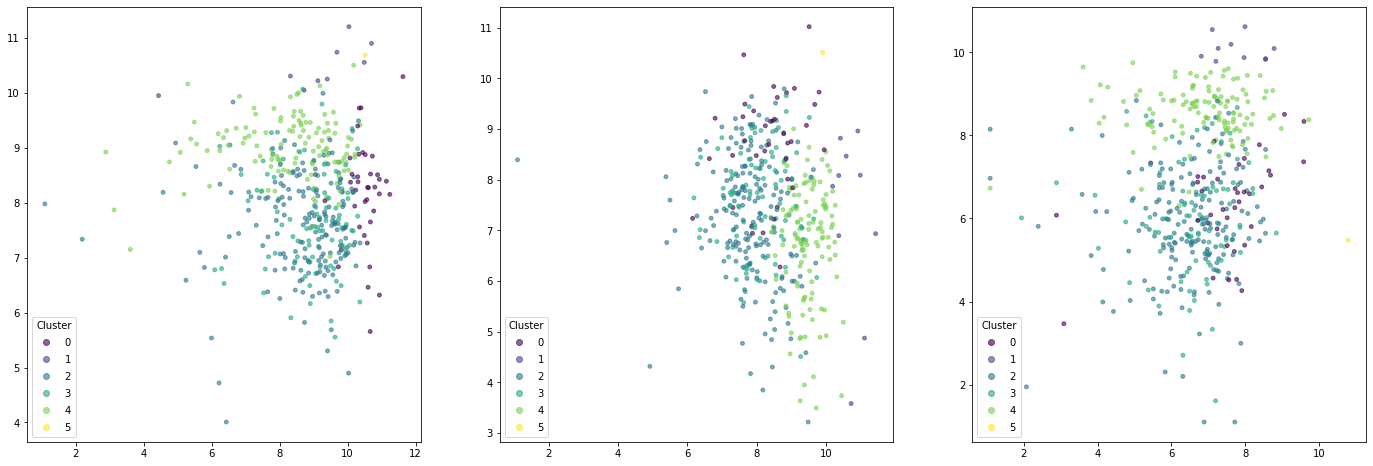

In [62]:
fig = plt.figure(figsize=(24, 8))

sub1 = plt.subplot(1, 3, 1)
sub1 = plt.scatter(np.log(pred_df.Fresh), np.log(pred_df.Milk), c=pred_df.cluster, alpha = 0.6, s=15)
sub1 = plt.legend(*sub1.legend_elements(),loc="lower left", title="Cluster");

sub2 = plt.subplot(1, 3, 2)
sub2 = plt.scatter(np.log(pred_df.Grocery), np.log(pred_df.Frozen), c=pred_df.cluster, alpha = 0.6, s=15)
sub2 = plt.legend(*sub2.legend_elements(),loc="lower left", title="Cluster");

sub2 = plt.subplot(1, 3, 3)
sub3 = plt.scatter(np.log(pred_df.Delicassen), np.log(pred_df.Detergents_Paper), c=pred_df.cluster, alpha = 0.6, s=15)
sub3 = plt.legend(*sub3.legend_elements(),loc="lower left", title="Cluster");

plt.show()

Wenn Ihr noch weitere Visualisierungsmöglichkeiten haben wollt, kann ich Euch diesen [Artikel](https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489) empfehlen!